# Bike Sharing System Data
### by Evelin Battocchio

## Contents

<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='wrangling'></a>
## Preliminary Wrangling

In this project, I'll investigate a data set containing information about individual rides made in the bike-sharing system provided by Bay Wheels in 2019, which covers the greater San Francisco Bay area. To obtain the dataset for the whole year, I joined together multiple `.csv` files, which I obtained from the Bay Wheels company website [1].

In [71]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [72]:
# Join data from all months of 2019
df = pd.concat([pd.read_csv(file) for file in glob.glob("Data/*.csv")], ignore_index=True)

In [73]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [74]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app
2506982,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,NaN,NaN,37.811042,-122.418149,NaN,NaN,37.810970,-122.418054,662304,Subscriber,NaN,app


In [75]:
df.shape

(2506983, 15)

In [76]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

As a first step, I'll start by deleting the columns that I don't consider useful for the analysis: `bike_share_for_all_trip` and `rental_access_method` (especially the last one, which contains too many null values).

In [77]:
# Drop unnecessary columns
df.drop(["bike_share_for_all_trip", "rental_access_method"], axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [78]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory 

As a next step, I'll remove the entries that contain null values (they do not seem to be too many, considering the total number of rows).

In [79]:
# Drop rows with null values
df.dropna(inplace=True)

In [80]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2407259 non-null  int64  
 1   start_time               2407259 non-null  object 
 2   end_time                 2407259 non-null  object 
 3   start_station_id         2407259 non-null  float64
 4   start_station_name       2407259 non-null  object 
 5   start_station_latitude   2407259 non-null  float64
 6   start_station_longitude  2407259 non-null  float64
 7   end_station_id           2407259 non-null  float64
 8   end_station_name         2407259 non-null  object 
 9   end_station_latitude     2407259 non-null  float64
 10  end_station_longitude    2407259 non-null  float64
 11  bike_id                  2407259 non-null  int64  
 12  user_type                2407259 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory 

In [81]:
# Check for null values
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [82]:
# Check for duplicates
df.duplicated().sum()

0

By observing the columns data types, it can be noted that the following changes should be made:

* `start_time` and `end_time` should be of type `datetime`
* `start_station_id` and `end_station_id`  should be of type `int64`

In the following I'll implement these changes.

In [83]:
# Convert start_time and end_time to datetime
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

In [84]:
# Convert start_station_id and end_station_id to int64
df["start_station_id"] = df["start_station_id"].astype("int64")
df["end_station_id"] = df["end_station_id"].astype("int64")

In [85]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  int64         
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  int64         
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  bike_id                  2407259 non-null  int64         
 12  

In [86]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


In [87]:
# Check values for start_station_id
df["start_station_id"].value_counts()

58     44769
81     42568
30     40148
15     38717
67     36270
       ...  
428        3
444        3
484        2
420        1
65         1
Name: start_station_id, Length: 434, dtype: int64

In [88]:
# Check values for end_station_id
df["end_station_id"].value_counts()

67     51793
30     50769
15     47925
21     47678
58     43987
       ...  
429        4
444        3
428        3
484        2
65         1
Name: end_station_id, Length: 435, dtype: int64

In [89]:
# Check values for user type
df["user_type"].value_counts()

Subscriber    1935042
Customer       472217
Name: user_type, dtype: int64

In [90]:
df.shape

(2407259, 13)

### What is the structure of your dataset?

The dataset contains 13 columns and 2407259 entries. Most variables are numeric,  except for station names and user type. 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested about the following topics:

- When are most trips taken in terms of day of the week and month of the year?
- How long does the average trip take?
- Does the above depend on whether a user is a subscriber or a customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the main features that will help me to support my investigation are:

- `duration_sec`
- `start_time`
- `end_time`
- `user_type`

<a id='univariate'></a>
## Univariate Exploration

In this section, I'll investigate distributions of the following individual variables:

* Trip duration
* Rides per user type
* Rides per month of year
* Rides per day of week

### Trip duration

In order to make the distribution of trip duration easier to understand, I'll plot it in units of minutes.

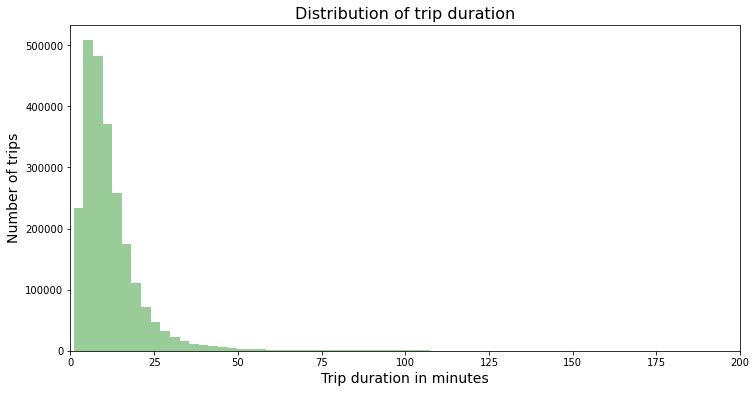

In [91]:
# Distribution of trip duration
plt.figure(figsize=(12,6))
sb.distplot(df['duration_sec']/60, kde=False, bins =500, color="g")
plt.title("Distribution of trip duration", fontsize= 16)
plt.xlabel('Trip duration in minutes', fontsize=14)
plt.ylabel('Number of trips', fontsize= 14);
plt.xlim(0,200)
plt.show()

### Distribution of rides according to user type

The next variable of interest is the distribution of rides according to the type of user: `subscriber` or `customer`. I'll plot this information in two types of graphs: a bar chart and pie chart.

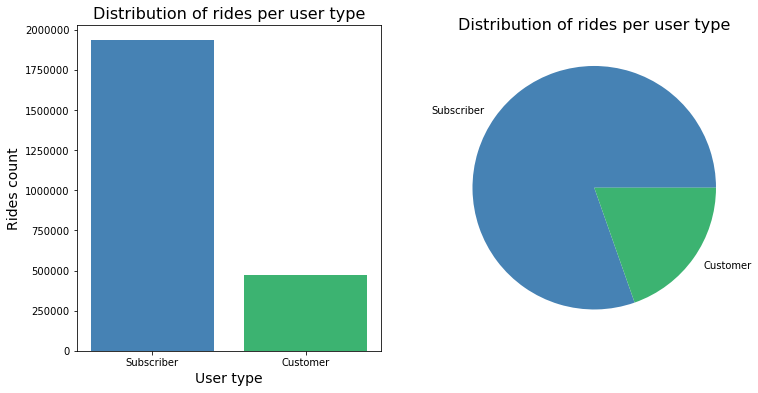

In [92]:
# Plot distribution of rides according to user type
user_counts = df["user_type"].value_counts()
plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
plt.bar(user_counts.index, user_counts.values, color=["steelblue", "mediumseagreen"]) 
plt.title('Distribution of rides per user type', fontsize=16)
plt.xlabel('User type', fontsize=14)
plt.ylabel('Rides count', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(user_counts, labels=["Subscriber", "Customer"], colors=["steelblue", "mediumseagreen"]);
plt.title('Distribution of rides per user type', fontsize=16);

### Distribution of rides per month of year

Next, I want to plot the distribution of rides in each month of the year, taking into account the information on the `start_time` column, that is, when the rides start. In order to do this, I must first obtain the month information from the `datetime` object in that column, which is easily done in the cell below:

In [93]:
# Create column for starting month
df["start_month"] = pd.DatetimeIndex(df['start_time']).month

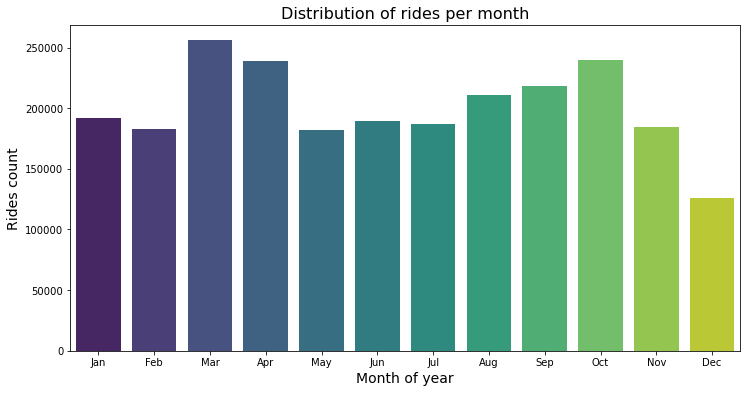

In [94]:
# Plot distribution of rides per month as countplot
plt.figure(figsize=(12, 6))
sb.countplot(data=df,x='start_month', palette="viridis");
plt.title('Distribution of rides per month', fontsize=16);
plt.xlabel('Month of year', fontsize=14);
plt.ylabel('Rides count', fontsize=14);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);

### Distribution of rides per day of week

Similar to the previous case, now I want to extract the information corresponding to the days of the week, which I do as follows:

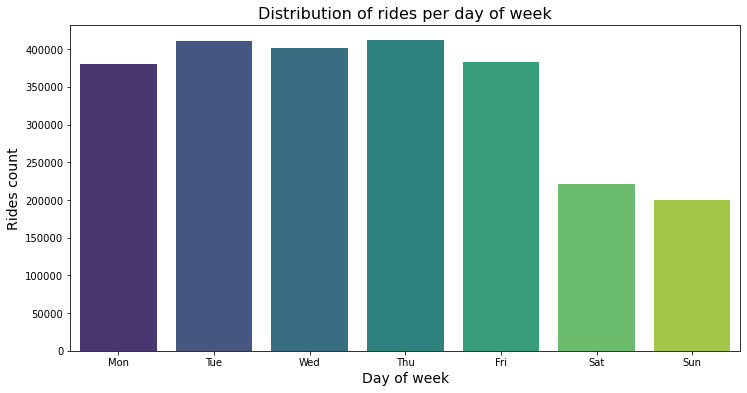

In [95]:
# Create column for starting day
df["start_day"] = pd.DatetimeIndex(df['start_time']).weekday

# Plot distribution of rides per day as countplot
plt.figure(figsize=(12, 6))
sb.countplot(data=df,x='start_day', palette="viridis");
plt.title('Distribution of rides per day of week', fontsize=16);
plt.xlabel('Day of week', fontsize=14);
plt.ylabel('Rides count', fontsize=14);
plt.xticks([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the variables I analyzed, the following can be observed:

* The majority of bike rides last between 0 and 25 minutes.
* Approximately 80% of the people who used the bicycles are subscribers, while the remaining 20% are occasional users.
* The use of the bicycle system remained almost constant during the week, but dropped significantly on the weekends.
* The months of the year in which the bicycle system was most used were March, April and October, while the month in which it was least used was December.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- In the case of trip duration, I had to limit the `x` axis values in order to eliminate possible outliers, and adjust the bins size for a better visualization. 
- As for the distribution per user type, I modified the `y` axis values so that the scientific notation was not displayed, but the complete numbers. 
- For the distribution of the days of the week and months of the year, I had to add columns to extract the necessary information from the `start_time` variable (of type `datetime`). In addition, I had to adjust the `x` axis labels to replace the numbers with the corresponding strings.

<a id='bivariate'></a>
## Bivariate Exploration

In this section, I'll investigate relationships between different pairs of variables in the
dataset. 

### Trip duration per user type

Text(0, 0.5, 'Mean trip duration [min]')

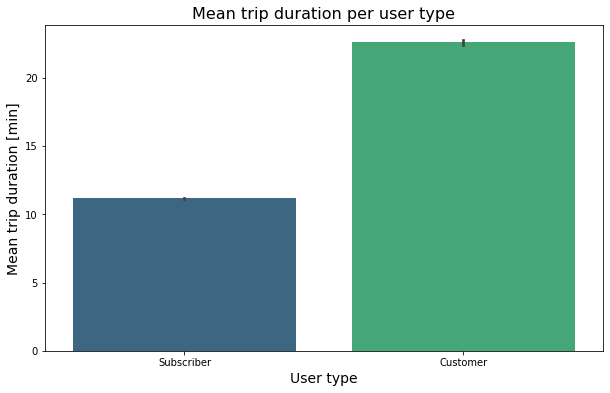

In [96]:
# Add column with duration in minutes
df["duration_min"] = df["duration_sec"]/60

# Plot trip duration vs user type as barplot
plt.figure(figsize =(10, 6)) 
sb.barplot(data=df, x="user_type", y="duration_min", palette="viridis")
plt.title('Mean trip duration per user type', fontsize=16)
plt.xlabel('User type', fontsize=14)
plt.ylabel('Mean trip duration [min]', fontsize=14)

### Trip duration per day of week

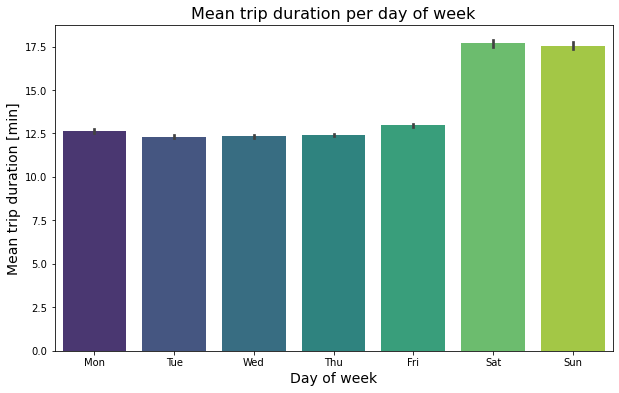

In [97]:
# Plot trip duration vs day of week as barplot
plt.figure(figsize =(10, 6)) 
sb.barplot(data=df, x="start_day", y="duration_min", palette="viridis")
plt.title('Mean trip duration per day of week', fontsize=16)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Mean trip duration [min]', fontsize=14)
plt.xticks([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

### Trip duration per month of year

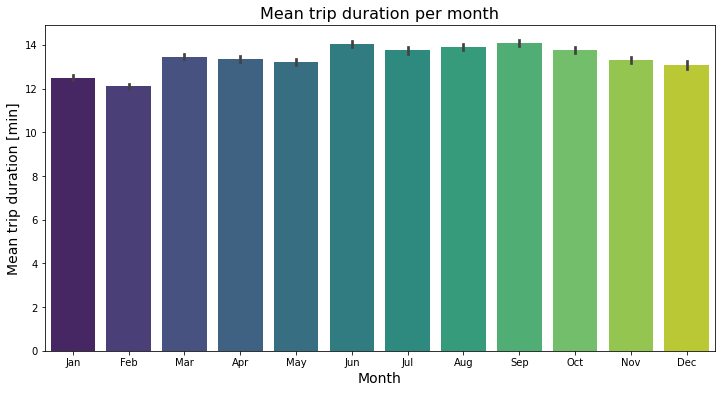

In [98]:
# Plot trip duration vs month as barplot
plt.figure(figsize =(12, 6)) 
sb.barplot(data=df, x="start_month", y="duration_min", palette="viridis")
plt.title('Mean trip duration per month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean trip duration [min]', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the plots between pairs of variables, the following observations can be made:

* On average, the duration of bike rides is longer in occasional customers (approx. 22 min) than in subscribed users (approx. 11 min).
* Although the number of trips is lower on Saturdays and Sundays, the average trip duration is longer during the weekend than on weekdays.
* The average duration of bike rides remains constant throughout the year, there are no significant fluctuations between the different months.

<a id='multivariate'></a>
## Multivariate Exploration

In this section, I will combine the variables observed previously in a multivariate plot, so as to investigate the dataset even further.

### Trip duration per day of week and user type

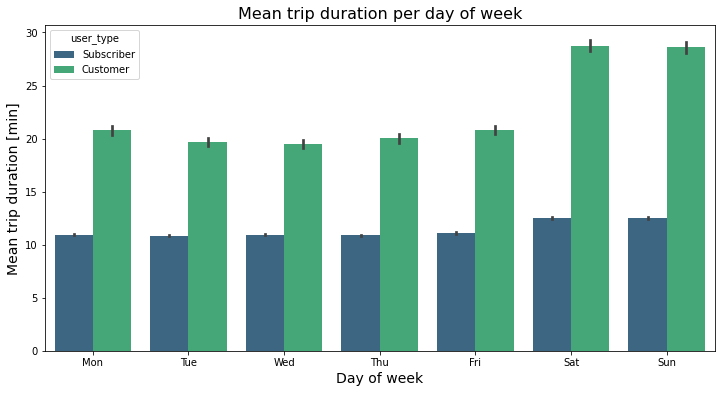

In [99]:
# Plot trip duration per day of week and user type as barplot
plt.figure(figsize =(12, 6)) 
sb.barplot(data=df, x="start_day", y="duration_min", hue="user_type", palette="viridis")
plt.title('Mean trip duration per day of week', fontsize=16)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Mean trip duration [min]', fontsize=14)
plt.xticks([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

### Trip duration per month and user type

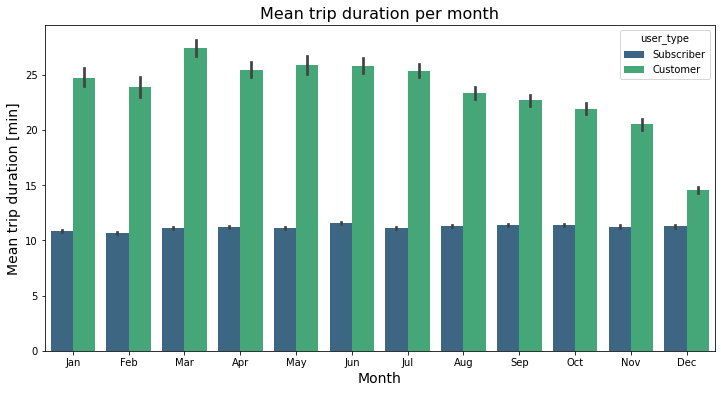

In [100]:
# Plot trip duration per month and user type as barplot
plt.figure(figsize =(12, 6)) 
sb.barplot(data=df, x="start_month", y="duration_min", hue="user_type", palette="viridis")
plt.title('Mean trip duration per month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean trip duration [min]', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Looking at the multivariate plots, the following conclusions can be derived:

* It can be confirmed that on average, the duration of bike rides is longer for occasional customers than for subscribed users.
* The fact that the trip lengths are longer on the weekends is mainly attributed to occasional users. 
* Throughout the year, the ride duration remains more or less constant for subscribers. In the case of occasional customers, the trip length decreases during the winter, especially in December.

In [101]:
df.shape

(2407259, 16)

In [102]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  int64         
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  int64         
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  bike_id                  2407259 non-null  int64         
 12  

After inserting the additional columns required for the analysis, the final dataset contains 16 columns and 2407259 rows.

<a id='references'></a>
## References

[1] https://www.lyft.com/bikes/bay-wheels/system-data